In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Add src to path
base_dir = Path('../')
sys.path.append(str(base_dir / 'src'))

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Raw Data

In [22]:
# Load the dataset
from data_processing import load_data

df = load_data()
print("Dataset loaded successfully")
print(f"Shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")

Dataset loaded successfully
Shape: (100000, 54)

Data types:
person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
ded

## 2. Handle Missing Values

In [23]:
# Check for missing values
print("Missing values:")
missing_count = df.isnull().sum()
print(missing_count[missing_count > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

if df.isnull().sum().sum() > 0:
    print("\nRemoving rows with missing values...")
    df = df.dropna()
    print(f"New shape after removing NaN: {df.shape}")
else:
    print("No missing values found!")

Missing values:
alcohol_freq    30083
dtype: int64

Total missing values: 30083

Removing rows with missing values...
New shape after removing NaN: (69917, 54)


## 3. Identify Target and Features

In [24]:
# Identify target column
target_col = 'annual_medical_cost' if 'annual_medical_cost' in df.columns else 'charges'
print(f"Target column: {target_col}")

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures:\n{X.columns.tolist()}")

Target column: annual_medical_cost

Features shape: (69917, 53)
Target shape: (69917,)

Features:
['person_id', 'age', 'sex', 'region', 'urban_rural', 'income', 'education', 'marital_status', 'employment_status', 'household_size', 'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']


## 4. Encode Categorical Features

In [25]:
# Create a copy for preprocessing
X_processed = X.copy()

# Get categorical columns
categorical_cols = X_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Manual encoding for known categorical features
if 'sex' in X_processed.columns:
    print(f"\nEncoding 'sex': {X_processed['sex'].unique()}")
    X_processed['sex'] = X_processed['sex'].map({'female': 0, 'male': 1})
    print(f"Encoded 'sex': {X_processed['sex'].unique()}")

if 'smoker' in X_processed.columns:
    print(f"\nEncoding 'smoker': {X_processed['smoker'].unique()}")
    X_processed['smoker'] = X_processed['smoker'].map({'no': 0, 'yes': 1})
    print(f"Encoded 'smoker': {X_processed['smoker'].unique()}")

# Check remaining categorical columns
remaining_categorical = X_processed.select_dtypes(include=['object']).columns.tolist()
print(f"\nRemaining categorical columns: {remaining_categorical}")

Categorical columns: ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']

Encoding 'sex': ['Female' 'Male' 'Other']
Encoded 'sex': [nan]

Encoding 'smoker': ['Never' 'Former' 'Current']
Encoded 'smoker': [nan]

Remaining categorical columns: ['region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'alcohol_freq', 'plan_type', 'network_tier']


## 5. One-Hot Encoding for Remaining Categorical Features

In [26]:
# One-hot encoding for remaining categorical columns
if remaining_categorical:
    print(f"Applying one-hot encoding to: {remaining_categorical}")
    X_processed = pd.get_dummies(X_processed, columns=remaining_categorical, drop_first=True)
    print(f"\nShape after one-hot encoding: {X_processed.shape}")

print(f"\nFinal features: {X_processed.columns.tolist()}")
print(f"\nFeature dtypes:\n{X_processed.dtypes}")

Applying one-hot encoding to: ['region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'alcohol_freq', 'plan_type', 'network_tier']

Shape after one-hot encoding: (69917, 70)

Final features: ['person_id', 'age', 'sex', 'income', 'household_size', 'dependents', 'bmi', 'smoker', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'region_East', 'region_North', 'regi

## 6. Remove Identifier Columns

In [27]:
# Remove identifier columns if present
id_cols = ['person_id', 'id', 'index']
cols_to_drop = [col for col in id_cols if col in X_processed.columns]

if cols_to_drop:
    print(f"Dropping identifier columns: {cols_to_drop}")
    X_processed = X_processed.drop(columns=cols_to_drop)
    print(f"Shape after dropping identifiers: {X_processed.shape}")
else:
    print("No identifier columns found")

print(f"\nFinal features after cleanup: {X_processed.columns.tolist()}")

Dropping identifier columns: ['person_id']
Shape after dropping identifiers: (69917, 69)

Final features after cleanup: ['age', 'sex', 'income', 'household_size', 'dependents', 'bmi', 'smoker', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'region_East', 'region_North', 'region_South', 'region_West', 'urban_rural_Suburban', 'urban_rural_Urban', 'education_Doctorate', 'education_H

## 7. Check Data Quality

In [28]:
# Final data quality checks
print("\n" + "="*60)
print("DATA QUALITY CHECK")
print("="*60)
print(f"\nFeatures shape: {X_processed.shape}")
print(f"Target shape: {y.shape}")
print(f"\nMissing values in features: {X_processed.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")
print(f"\nFeature dtypes:")
print(X_processed.dtypes.value_counts())
print(f"\nFeature statistics:\n{X_processed.describe().T}")


DATA QUALITY CHECK

Features shape: (69917, 69)
Target shape: (69917,)

Missing values in features: 139834
Missing values in target: 0

Feature dtypes:
int64      30
bool       25
float64    14
Name: count, dtype: int64

Feature statistics:
                               count          mean           std      min  \
age                          69917.0     47.591859     16.038835     0.00   
sex                              0.0           NaN           NaN      NaN   
income                       69917.0  49906.938227  46958.539478  1100.00   
household_size               69917.0      2.431226      1.075239     1.00   
dependents                   69917.0      0.897135      0.951557     0.00   
bmi                          69917.0     26.991912      4.989552    12.00   
smoker                           0.0           NaN           NaN      NaN   
visits_last_year             69917.0      1.928987      1.735559     0.00   
hospitalizations_last_3yrs   69917.0      0.092581      0.302877 

## 8. Train-Test Split

In [29]:
from sklearn.model_selection import train_test_split

# Perform train-test split
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=test_size, random_state=random_state
)

print(f"Train set size: {X_train.shape[0]} samples ({100*(1-test_size):.0f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({100*test_size:.0f}%)")
print(f"\nFeatures: {X_train.shape[1]}")
print(f"\nTarget distribution:")
print(f"Train - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"Test  - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

Train set size: 55933 samples (80%)
Test set size: 13984 samples (20%)

Features: 69

Target distribution:
Train - Mean: 3000.93, Std: 3105.75
Test  - Mean: 3029.14, Std: 3136.40


## 9. Visualize Feature Distributions

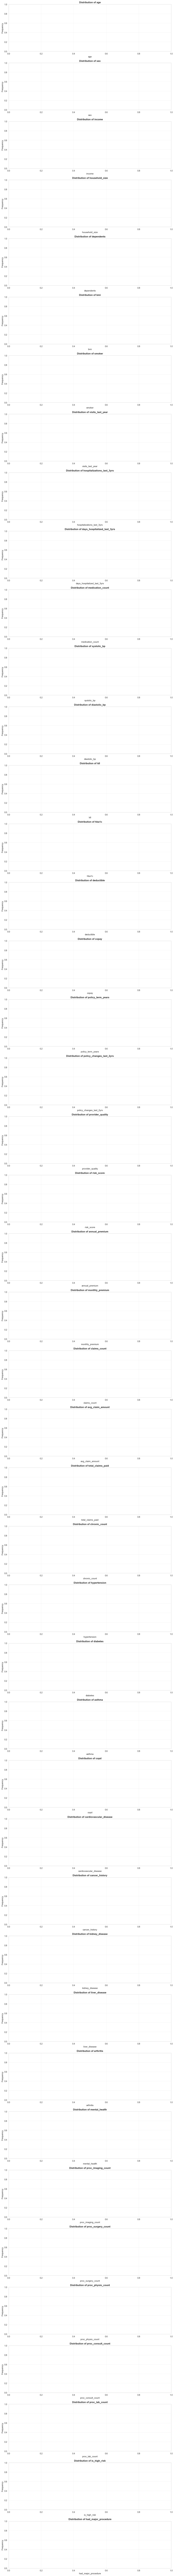

Total numerical features: 44


In [30]:
# Plot feature distributions
numerical_features = X_processed.select_dtypes(include=[np.number]).columns.tolist()
n_features = len(numerical_features)

fig, axes = plt.subplots(max(1, n_features), 1, figsize=(12, 4*max(1, n_features)))
if n_features == 1:
    axes = [axes]

for idx, col in enumerate(numerical_features):
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total numerical features: {n_features}")

## 10. Summary & Next Steps

In [31]:
print("\n" + "="*60)
print("DATA PREPARATION SUMMARY")
print("="*60)
print(f"\nProcessing Steps Completed:")
print(f"✓ Loaded raw data: {df.shape}")
print(f"✓ Handled missing values")
print(f"✓ Encoded categorical features")
print(f"✓ Removed identifier columns")
print(f"✓ Created train-test split")
print(f"\nFinal Dataset:")
print(f"  - Training samples: {X_train.shape[0]}")
print(f"  - Test samples: {X_test.shape[0]}")
print(f"  - Features: {X_train.shape[1]}")
print(f"  - Target: {target_col}")
print(f"\nReady for modeling! Proceed to 03_modeling.ipynb")
print("="*60)


DATA PREPARATION SUMMARY

Processing Steps Completed:
✓ Loaded raw data: (69917, 54)
✓ Handled missing values
✓ Encoded categorical features
✓ Removed identifier columns
✓ Created train-test split

Final Dataset:
  - Training samples: 55933
  - Test samples: 13984
  - Features: 69
  - Target: annual_medical_cost

Ready for modeling! Proceed to 03_modeling.ipynb
